In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [2]:
reviews = pd.read_csv(r'C:\Users\User\Desktop\Amazon Echo Sentiment Analysis\amazon_reviews.csv')
reviews = reviews.drop(['date'], axis = 1)
reviews

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

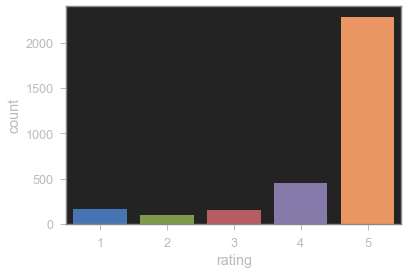

In [4]:
#countplot of ratings
sns.countplot(x = reviews['rating'])

<AxesSubplot:xlabel='feedback', ylabel='count'>

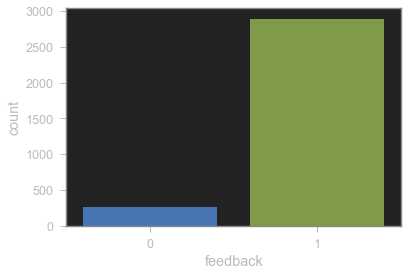

In [5]:
#countplot of positive and negative reviews with 1 being positive
sns.countplot(x = reviews['feedback'])

In [6]:
#calculate the length of each entry in the verified_reviews column
reviews['length'] = reviews['verified_reviews'].apply(len)
reviews

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

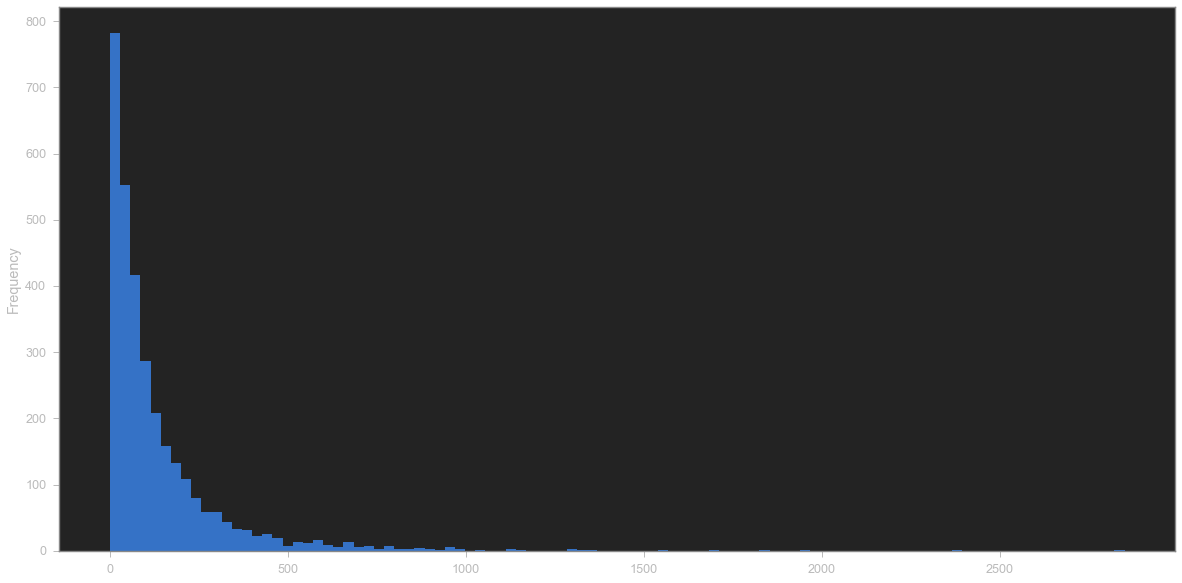

In [7]:
#shows frequency of review length
reviews['length'].plot(bins = 100, kind = 'hist', figsize = (20,10))

In [8]:
reviews.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [9]:
#separating reviews into positive and negative
positive = reviews[reviews['feedback'] == 1]
negative = reviews[reviews['feedback'] == 0]

#converting all positive and negative reviews into sentences
pos_sent = positive['verified_reviews'].tolist()
neg_sent = negative['verified_reviews'].tolist()

#converting all sentences into a single string
pos_string = " ".join(pos_sent)
neg_string = " ".join(neg_sent)

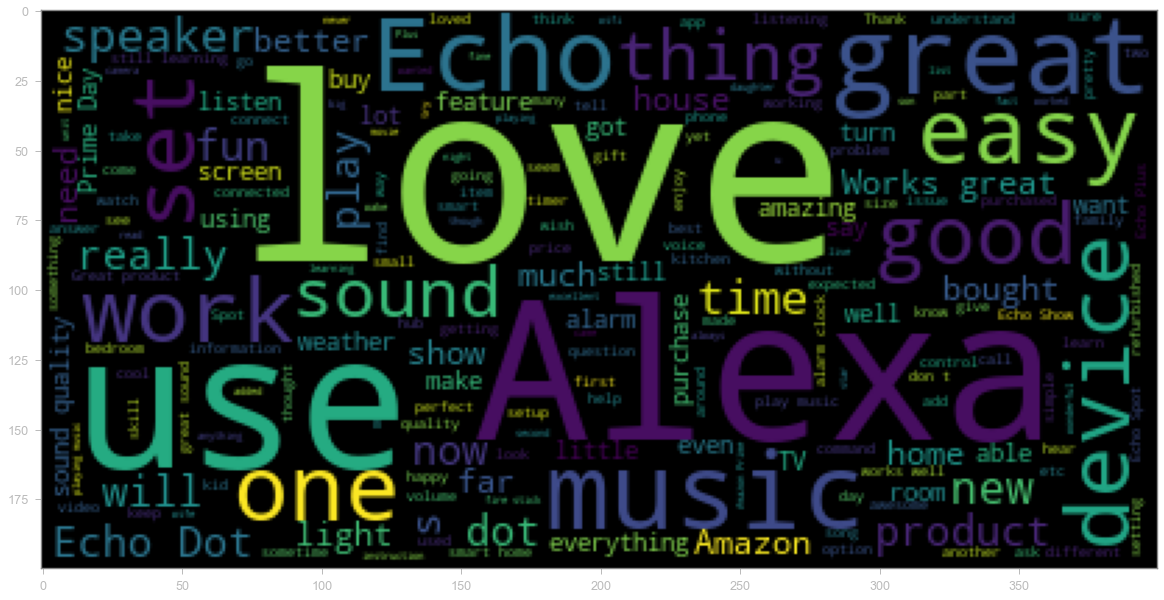

In [10]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_string))

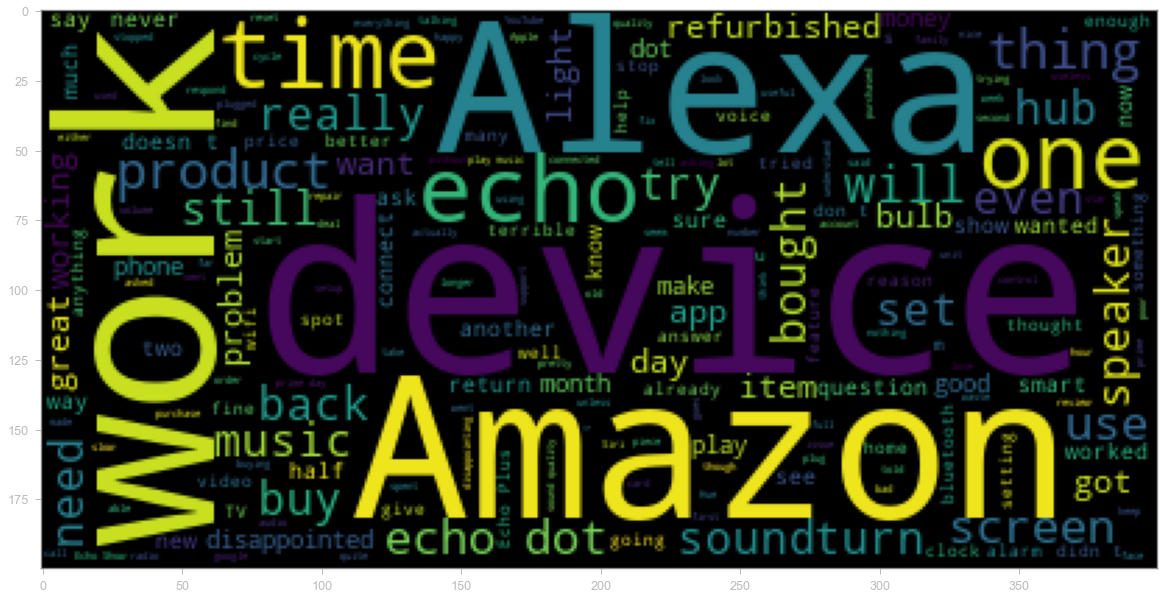

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_string))

In [12]:
#creating a pipeline to remove punctuations, stopwords and perform count vectorisation
import string
import nltk
from nltk.corpus import stopwords

#removing punctuation, joining text and cleaning stopwords
def review_cleaning(text):
    punc_removed = [char for char in text if char not in string.punctuation]
    text_joined = ''.join(punc_removed)
    text_cleaned = [word for word in text_joined.split() if word.lower() not in stopwords.words('english')]
    return text_cleaned

In [13]:
reviews_cleaned = reviews['verified_reviews'].apply(review_cleaning)

In [14]:
#comparing cleaned and original review
print(reviews_cleaned[5])
print(reviews['verified_reviews'][5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = review_cleaning, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(reviews['verified_reviews'])

In [16]:
#splitting the dataset into X and y which are reviews and labels for pos/neg reviews respectively 
X = pd.DataFrame(reviews_countvectorizer.toarray())
y = reviews['feedback']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

              precision    recall  f1-score   support

           0       0.63      0.37      0.46        52
           1       0.94      0.98      0.96       578

    accuracy                           0.93       630
   macro avg       0.79      0.67      0.71       630
weighted avg       0.92      0.93      0.92       630



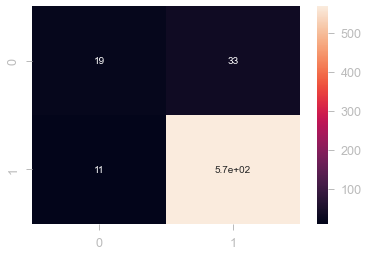

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

#using naive bayes classifiers
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.83      0.51        23
           1       0.99      0.95      0.97       607

    accuracy                           0.94       630
   macro avg       0.68      0.89      0.74       630
weighted avg       0.97      0.94      0.95       630



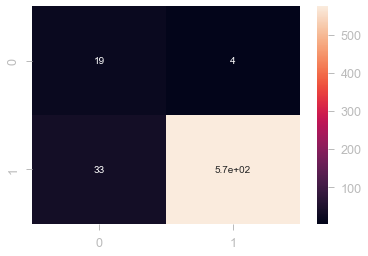

In [19]:
#using logistic regression 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.17      0.29        52
           1       0.93      1.00      0.96       578

    accuracy                           0.93       630
   macro avg       0.92      0.59      0.63       630
weighted avg       0.93      0.93      0.91       630



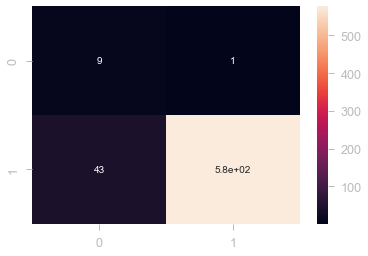

In [20]:
#using gradient boosted trees
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))